In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## This notebook creates training, testing, and validation subsets for the random forest classifier. It also plots histograms comparing the distributions of the three subsets to the full dataset for select predictors (Fig. 2).

#### EML_May_2012_2021.csv contains 10 years (2012-2021) of EML data for the month of May only. Data are 6-hourly (0, 6, 12, 18 UTC).
 - 'eml' variable is binary, where 1=EML, 0=no EML. This is the variable we are trying to predict.
 - latitude, longitude, and time variables indicate when and where there is or isn't an EML.
 - all other variables are possible predictors for our ML model

In [2]:
# Open the CSV file containing the May 2012-2021 EML dataset
df = pd.read_csv('/home/scratch/mandrews/eae_598/EML_May_2012_2021.csv')
df.head()

,latitude,longitude,time,Z500,t500,wspd500,wdir500,mucape,mucin,mlcape,...,theta_850,theta_925,theta_sfc,t925,rh_sfc,rh_925,rh_850,rh_700,rh_500,rh_3_6km
0,26.0,253.00,2012-05-01 00:00:00,5.843171,-9.134342,5.660553,205.892493,0.0,0.0,0.0,...,NaN,NaN,313.883362,NaN,0.267810,NaN,NaN,0.448221,0.275484,0.199151
1,26.0,253.25,2012-05-01 00:00:00,5.843966,-9.297320,5.074431,202.685653,0.0,0.0,0.0,...,NaN,NaN,315.494537,NaN,0.253985,NaN,NaN,0.365675,0.325275,0.236668
2,26.0,253.50,2012-05-01 00:00:00,5.844372,-9.441615,5.426132,192.996072,0.0,0.0,0.0,...,NaN,NaN,316.565155,NaN,0.233949,NaN,NaN,0.309428,0.276469,0.241000
3,26.0,253.75,2012-05-01 00:00:00,5.846489,-9.879836,4.917766,180.679988,0.0,0.0,0.0,...,NaN,NaN,317.429565,NaN,0.219240,NaN,NaN,0.280152,0.366142,0.259380
4,26.0,254.00,2012-05-01 00:00:00,5.847194,-10.555432,3.565028,182.630536,0.0,0.0,0.0,...,NaN,NaN,318.495514,NaN,0.158403,NaN,NaN,0.231137,0.591805,0.389781


In [3]:
# This seperates the date column to get a new year column
df['year'] = [int(x.split('-')[0]) for x in df['time']]

# This seperates the date column to get a new hour column
df['hour'] = [str(x.split(' ')[1])[0:2] for x in df['time']]

# Change variable types to integers to make plotting easier
df['eml'] = df['eml'].astype(int)
df['hour'] = df['hour'].astype(int)

## Setting up the machine learning subsets. 
The dataset is divided into a testing (20%), training (70%), and validation (10%) subsets. Since meteorological data has a temporal component, EMLs from one 6-hour time step are not independent of EMLs 6 hours later. Therefore, data was split by year to ensure independent subsets.

In [4]:
# Prior to dividing the dataset, nans in the dataset are filled with zeros because scikit-learn's Random Forest Classifier cannot handle nan values
# nan values occur primarily in the high terrain for variables at 850/925-mb, where these levels are below the surface
df = df.fillna(0, inplace=False)

In [5]:
# Training dataset is the first 7 years of May data; 2012-2018
df_train = df[df['year'] <= 2018]
df_train

,latitude,longitude,time,Z500,t500,wspd500,wdir500,mucape,mucin,mlcape,...,theta_sfc,t925,rh_sfc,rh_925,rh_850,rh_700,rh_500,rh_3_6km,year,hour
0,26.0,253.00,2012-05-01 00:00:00,5.843171,-9.134342,5.660553,205.892493,0.0,0.0,0.0,...,313.883362,0.000000,0.267810,0.000000,0.000000,0.448221,0.275484,0.199151,2012,0
1,26.0,253.25,2012-05-01 00:00:00,5.843966,-9.297320,5.074431,202.685653,0.0,0.0,0.0,...,315.494537,0.000000,0.253985,0.000000,0.000000,0.365675,0.325275,0.236668,2012,0
2,26.0,253.50,2012-05-01 00:00:00,5.844372,-9.441615,5.426132,192.996072,0.0,0.0,0.0,...,316.565155,0.000000,0.233949,0.000000,0.000000,0.309428,0.276469,0.241000,2012,0
3,26.0,253.75,2012-05-01 00:00:00,5.846489,-9.879836,4.917766,180.679988,0.0,0.0,0.0,...,317.429565,0.000000,0.219240,0.000000,0.000000,0.280152,0.366142,0.259380,2012,0
4,26.0,254.00,2012-05-01 00:00:00,5.847194,-10.555432,3.565028,182.630536,0.0,0.0,0.0,...,318.495514,0.000000,0.158403,0.000000,0.000000,0.231137,0.591805,0.389781,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6538639,49.0,272.00,2018-05-31 18:00:00,5.667719,-9.666284,5.753697,283.082819,0.0,0.0,0.0,...,293.500702,287.103647,0.836269,0.985549,0.956288,0.843539,0.703381,0.800797,2018,18
6538640,49.0,272.25,2018-05-31 18:00:00,5.667521,-9.595386,6.016185,277.765935,0.0,0.0,0.0,...,293.962189,288.044867,0.826255,0.936943,0.956652,0.823724,0.695428,0.784143,2018,18
6538641,49.0,272.50,2018-05-31 18:00:00,5.667570,-9.481405,6.344665,272.307080,0.0,0.0,0.0,...,294.128265,288.822722,0.827210,0.896730,0.961424,0.802593,0.673174,0.757800,2018,18
6538642,49.0,272.75,2018-05-31 18:00:00,5.667714,-9.291416,6.721753,266.541788,0.0,0.0,0.0,...,294.046295,289.342084,0.830892,0.867535,0.981140,0.781513,0.614947,0.715272,2018,18


In [6]:
# Validation dataset is 1 year of May data; 2019
df_val = df[(df['year'] >= 2019) & (df['year'] < 2020)]
df_val

,latitude,longitude,time,Z500,t500,wspd500,wdir500,mucape,mucin,mlcape,...,theta_sfc,t925,rh_sfc,rh_925,rh_850,rh_700,rh_500,rh_3_6km,year,hour
6538644,26.0,253.00,2019-05-01 00:00:00,5.827989,-10.464353,19.246051,252.594767,0.0,0.0,0.0,...,312.626007,0.000000,0.174228,0.000000,0.000000,0.275108,0.099047,0.226807,2019,0
6538645,26.0,253.25,2019-05-01 00:00:00,5.828266,-10.276888,19.833372,253.364824,0.0,0.0,0.0,...,313.933441,0.000000,0.166687,0.000000,0.000000,0.229875,0.097474,0.296724,2019,0
6538646,26.0,253.50,2019-05-01 00:00:00,5.828925,-9.877706,20.593114,254.858470,0.0,0.0,0.0,...,314.813934,0.000000,0.159043,0.000000,0.000000,0.203662,0.086177,0.345202,2019,0
6538647,26.0,253.75,2019-05-01 00:00:00,5.831739,-9.281884,21.074163,256.289083,0.0,0.0,0.0,...,315.563202,0.000000,0.151207,0.000000,0.000000,0.187745,0.073806,0.335876,2019,0
6538648,26.0,254.00,2019-05-01 00:00:00,5.834427,-8.694516,20.940182,257.736864,0.0,0.0,0.0,...,316.256500,0.000000,0.124385,0.000000,0.000000,0.178646,0.063813,0.263736,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472731,49.0,272.00,2019-05-31 18:00:00,5.591082,-16.315627,30.053997,291.775299,0.0,0.0,0.0,...,288.149261,282.395290,0.469694,0.515348,0.741090,0.509939,0.166255,0.143174,2019,18
7472732,49.0,272.25,2019-05-31 18:00:00,5.587932,-16.369517,30.291869,291.958852,0.0,0.0,0.0,...,288.215698,282.439232,0.475981,0.510498,0.718567,0.496389,0.164403,0.119437,2019,18
7472733,49.0,272.50,2019-05-31 18:00:00,5.585183,-16.425622,30.447160,292.225965,0.0,0.0,0.0,...,288.296783,282.473893,0.475277,0.508621,0.706279,0.475942,0.168970,0.120923,2019,18
7472734,49.0,272.75,2019-05-31 18:00:00,5.582633,-16.488702,30.539861,292.558487,0.0,0.0,0.0,...,288.274384,282.660486,0.480912,0.508327,0.701150,0.454072,0.172307,0.124985,2019,18


In [7]:
# Testing dataset consists of 2 years of May data; 2020-2021
df_test = df[(df['year'] >= 2020)]
df_test

,latitude,longitude,time,Z500,t500,wspd500,wdir500,mucape,mucin,mlcape,...,theta_sfc,t925,rh_sfc,rh_925,rh_850,rh_700,rh_500,rh_3_6km,year,hour
7472736,26.0,253.00,2020-05-01 00:00:00,5.882973,-9.080142,4.736499,50.690152,96.337386,38.746296,9.792452,...,316.122772,0.000000,0.267491,0.000000,0.000000,0.366745,0.646741,0.456870,2020,0
7472737,26.0,253.25,2020-05-01 00:00:00,5.882899,-9.470903,7.298946,55.382251,0.000000,0.000000,0.000000,...,317.896332,0.000000,0.220645,0.000000,0.000000,0.299644,0.812187,0.514371,2020,0
7472738,26.0,253.50,2020-05-01 00:00:00,5.884871,-9.751612,6.594612,47.570292,0.000000,0.000000,0.000000,...,319.140411,0.000000,0.203965,0.000000,0.000000,0.251864,0.921588,0.531736,2020,0
7472739,26.0,253.75,2020-05-01 00:00:00,5.888208,-9.869505,2.485611,15.936129,17.783507,8.075992,13.203726,...,319.658234,0.000000,0.207216,0.000000,0.000000,0.247295,1.012561,0.506129,2020,0
7472740,26.0,254.00,2020-05-01 00:00:00,5.886718,-9.421213,3.706232,288.053873,51.866371,16.193762,0.000000,...,319.958496,0.000000,0.167469,0.000000,0.000000,0.236924,0.869302,0.449379,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9340915,49.0,272.00,2021-05-31 18:00:00,5.628952,-22.765195,4.868971,300.028326,248.305652,15.135935,156.721579,...,288.493622,284.182882,0.670136,0.754690,0.831006,0.791076,0.381812,0.524993,2021,18
9340916,49.0,272.25,2021-05-31 18:00:00,5.628375,-22.798795,5.133938,293.908841,181.057548,15.337450,64.293892,...,287.358551,283.550555,0.748556,0.792791,0.837313,0.767129,0.410274,0.536084,2021,18
9340917,49.0,272.50,2021-05-31 18:00:00,5.627888,-22.794938,5.563275,289.515151,171.448346,16.846009,25.247585,...,286.604645,283.073545,0.817406,0.812667,0.826199,0.740393,0.411757,0.524859,2021,18
9340918,49.0,272.75,2021-05-31 18:00:00,5.627685,-22.769974,5.936458,287.243396,96.711609,28.561943,0.000000,...,286.040405,282.751082,0.830719,0.826382,0.810477,0.732886,0.428558,0.525372,2021,18


### Compare subsets to the full dataset.
Here, we compare training, validation, and testing subsets to the full dataset to ensure their distributions are fairly similar. 

/tmp/ipykernel_53241/1962432558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['dataset'] = 'test'
/tmp/ipykernel_53241/1962432558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['dataset'] = 'train'
/tmp/ipykernel_53241/1962432558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

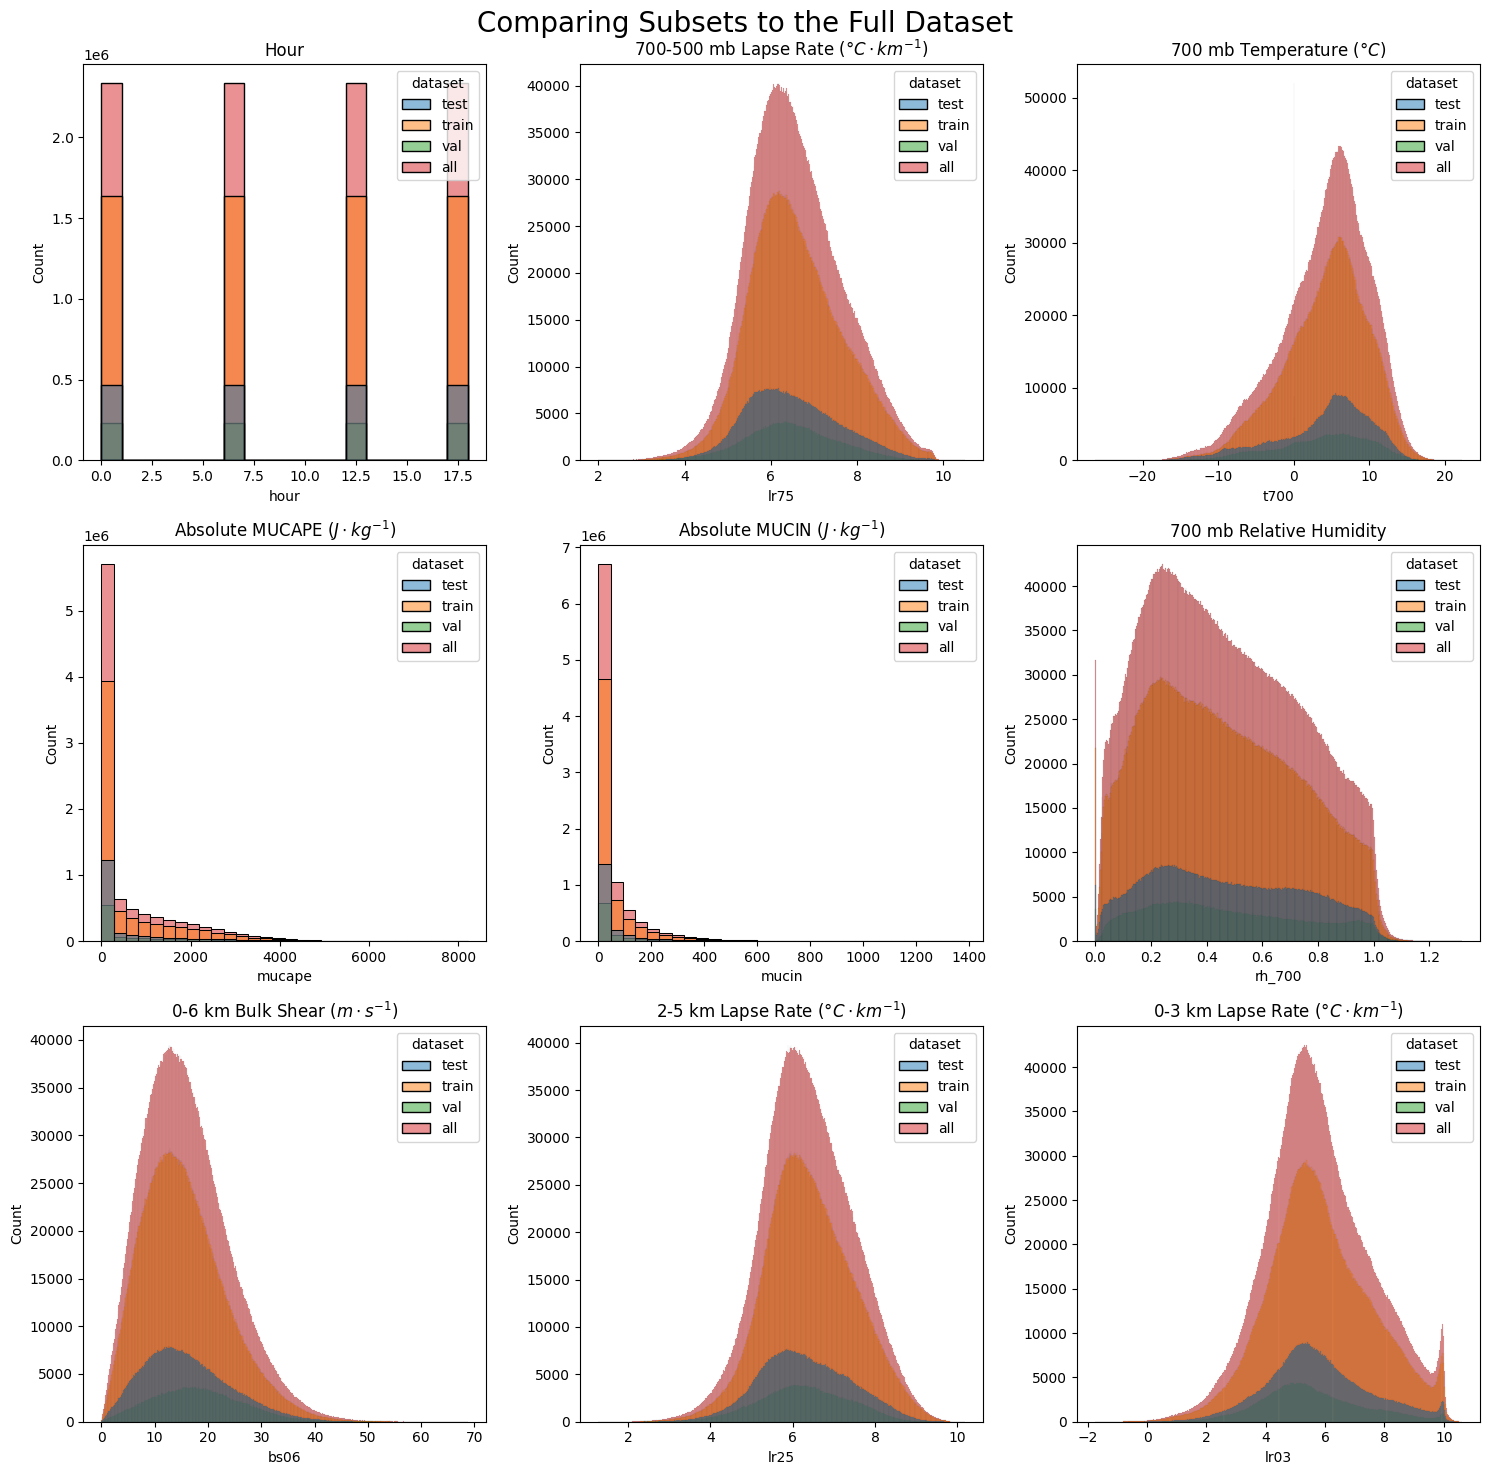

In [8]:
# Compare the distributions of the 3 subsets and the overall dataset

# This combines the subsets to the whole dataset to compare them, a new dataset column named 'dataset' indicates which subset they belong to
df_test['dataset'] = 'test'
df_train['dataset'] = 'train'
df_val['dataset'] = 'val'
df['dataset'] = 'all'
df_combined = pd.concat([df_test, df_train, df_val, df])

# Plot the distributions of the 3 subsets and full dataset as histograms 
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
sns.histplot(df_combined, x='hour', ax=axes[0,0], bins=18, hue='dataset').set_title("Hour")
sns.histplot(df_combined, x='lr75', ax=axes[0,1], binrange=(2,10.5), hue='dataset').set_title("700-500 mb Lapse Rate ($\degree C \cdot km^{-1}$)")
sns.histplot(df_combined, x='t700', ax=axes[0,2], hue='dataset').set_title("700 mb Temperature ($\degree C$)")
sns.histplot(df_combined, x='mucape', ax=axes[1,0], bins=30, hue='dataset').set_title("Absolute MUCAPE ($J \cdot kg^{-1}$)")
sns.histplot(df_combined, x='mucin', ax=axes[1,1], bins=30, hue='dataset').set_title("Absolute MUCIN ($J \cdot kg^{-1}$)")
sns.histplot(df_combined, x='rh_700', ax=axes[1,2], hue='dataset').set_title("700 mb Relative Humidity")
sns.histplot(df_combined, x='bs06', ax=axes[2,0], hue='dataset').set_title("0-6 km Bulk Shear ($m \cdot s^{-1}$)")
sns.histplot(df_combined, x='lr25', ax=axes[2,1], hue='dataset').set_title("2-5 km Lapse Rate ($\degree C \cdot km^{-1}$)")
sns.histplot(df_combined, x='lr03', ax=axes[2,2], hue='dataset').set_title("0-3 km Lapse Rate ($\degree C \cdot km^{-1}$)")
plt.suptitle('Comparing Subsets to the Full Dataset', fontsize=20)
plt.tight_layout()
plt.show()